In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [20]:
synthetic_CTGAN = pd.read_csv("CTGAN_Pokemon.csv", encoding="UTF-8")
synthetic_CTGAN.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,sdv-pii-64jr8,Dragon,Psychic,13,80,68,121,26,62,4,False,2.0
1,1,sdv-pii-xnuld,Fairy,Steel,87,157,15,29,35,107,2,False,2.0
2,2,sdv-pii-23pgo,Ground,Electric,77,23,39,78,27,95,4,False,2.0
3,3,sdv-pii-8mult,Bug,Water,57,134,24,68,119,106,4,False,3.0
4,4,sdv-pii-pjbi7,Fire,Ground,73,120,80,81,52,105,3,True,1.0


In [21]:
synthetic_Gaussian = pd.read_csv("Gaussian_Pokemon.csv", encoding="UTF-8")
synthetic_Gaussian.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,sdv-pii-64jr8,Ground,Dragon,81,93,99,88,83,71,6,False,0.0
1,1,sdv-pii-xnuld,Water,NaN,32,24,29,43,34,39,1,False,1.0
2,2,sdv-pii-23pgo,Dark,NaN,45,28,22,35,27,71,5,False,1.0
3,3,sdv-pii-8mult,Fire,NaN,80,101,80,135,129,64,1,False,2.0
4,4,sdv-pii-pjbi7,Fighting,NaN,57,74,43,71,71,79,3,False,1.0


In [22]:
df = pd.read_csv("C:\\Users\\Lisa\\Desktop\\FH\\GAI\\Pokemon\\data\\preprocessed_pokemon_with_Evolution.csv")
df.head()

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution
0,0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1.0
1,1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2.0
2,2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3.0
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,5.0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,1.0


In [29]:
# Für den echten DataFrame 'df'
df['Total'] = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Für den synthetischen DataFrame 'synthetic_CTGAN'
synthetic_CTGAN['Total'] = synthetic_CTGAN[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# Nun haben beide DataFrames eine neue Spalte "Total", die die Gesamtwerte enthält.


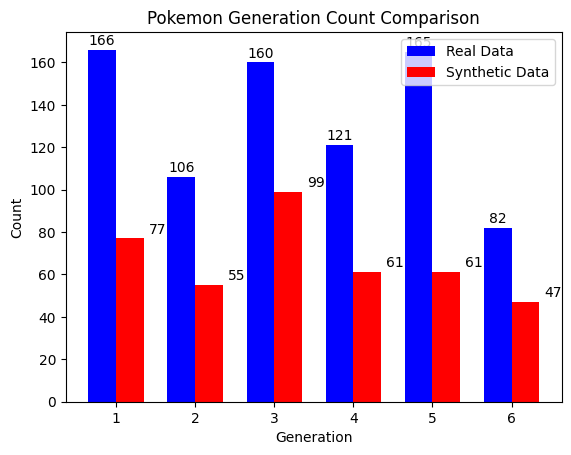

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Zählung der Generationen in den echten Daten
generation_count_real = df['Generation'].value_counts().sort_index()

# Zählung der Generationen in den synthetischen Daten
generation_count_synthetic = synthetic_CTGAN['Generation'].value_counts().sort_index()

# Sicherstellen, dass beide Serien die gleichen Indexe haben
all_generations = sorted(set(generation_count_real.index).union(set(generation_count_synthetic.index)))
generation_count_real = generation_count_real.reindex(all_generations, fill_value=0)
generation_count_synthetic = generation_count_synthetic.reindex(all_generations, fill_value=0)

# Indizes für die X-Achse generieren für die Anordnung der Balken nebeneinander
index = np.arange(len(all_generations))

# Balkenbreite festlegen
bar_width = 0.35

# Erstellen der Balkendiagramme für echte und synthetische Daten
plt.bar(index, generation_count_real.values, bar_width, label='Real Data', color='blue')
plt.bar(index + bar_width, generation_count_synthetic.values, bar_width, label='Synthetic Data', color='red')

# Hinzufügen der genauen Werte über jedem Balken
for x, y in zip(index, generation_count_real.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom')  # korrigierte Positionierung

for x, y in zip(index + bar_width, generation_count_synthetic.values):
    plt.text(x + bar_width, y + 1, str(y), ha='center', va='bottom')  # korrigierte Positionierung

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Pokemon Generation Count Comparison')
plt.xlabel('Generation')
plt.ylabel('Count')

# X-Achsen-Ticks anpassen, um beide Balkensätze korrekt anzuzeigen
plt.xticks(index + bar_width / 2, all_generations)

# Legende hinzufügen
plt.legend()

# Das Diagramm anzeigen
plt.show()


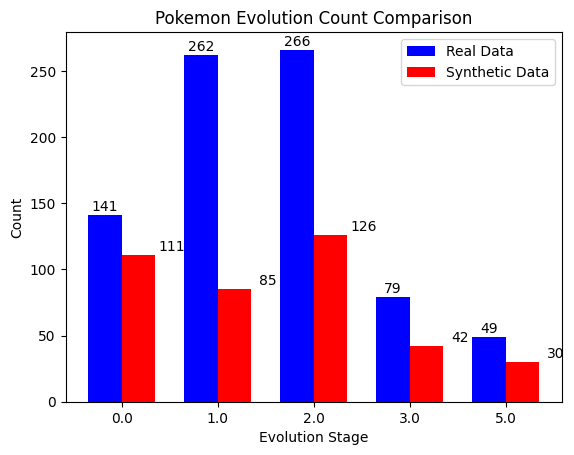

In [32]:
# Zählung der Evolutionen in den echten Daten
evolution_count_real = df['Evolution'].value_counts().sort_index()

# Zählung der Evolutionen in den synthetischen Daten
evolution_count_synthetic = synthetic_CTGAN['Evolution'].value_counts().sort_index()

# Sicherstellen, dass beide Serien die gleichen Indexe haben
all_evolutions = sorted(set(evolution_count_real.index).union(set(evolution_count_synthetic.index)))
evolution_count_real = evolution_count_real.reindex(all_evolutions, fill_value=0)
evolution_count_synthetic = evolution_count_synthetic.reindex(all_evolutions, fill_value=0)

# Indizes für die X-Achse generieren für die Anordnung der Balken nebeneinander
index = np.arange(len(all_evolutions))

# Balkenbreite festlegen
bar_width = 0.35

# Erstellen der Balkendiagramme für echte und synthetische Daten
plt.bar(index, evolution_count_real.values, bar_width, label='Real Data', color='blue')
plt.bar(index + bar_width, evolution_count_synthetic.values, bar_width, label='Synthetic Data', color='red')

# Hinzufügen der genauen Werte über jedem Balken
for x, y in zip(index, evolution_count_real.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom')  # korrigierte Positionierung

for x, y in zip(index + bar_width, evolution_count_synthetic.values):
    plt.text(x + bar_width, y + 1, str(y), ha='center', va='bottom')  # korrigierte Positionierung

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Pokemon Evolution Count Comparison')
plt.xlabel('Evolution Stage')
plt.ylabel('Count')

# X-Achsen-Ticks anpassen, um beide Balkensätze korrekt anzuzeigen
plt.xticks(index + bar_width / 2, all_evolutions)

# Legende hinzufügen
plt.legend()

# Das Diagramm anzeigen
plt.show()


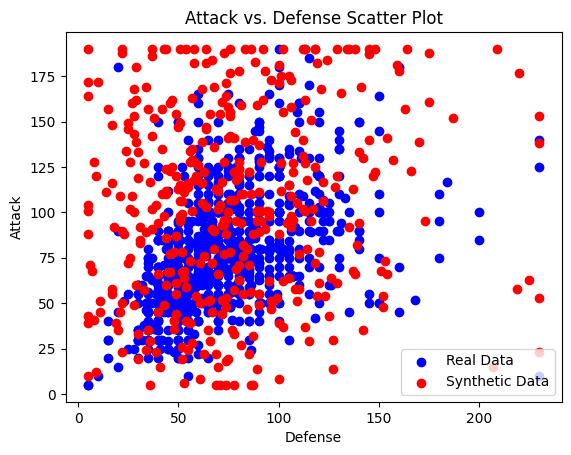

In [33]:
import matplotlib.pyplot as plt

# Scatterplot für echte Daten
plt.scatter(df['Defense'], df['Attack'], color='blue', label='Real Data')

# Scatterplot für synthetische Daten
plt.scatter(synthetic_CTGAN['Defense'], synthetic_CTGAN['Attack'], color='red', label='Synthetic Data')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Attack vs. Defense Scatter Plot')
plt.xlabel('Defense')
plt.ylabel('Attack')

# Legende hinzufügen
plt.legend()

# Das Diagramm anzeigen
plt.show()


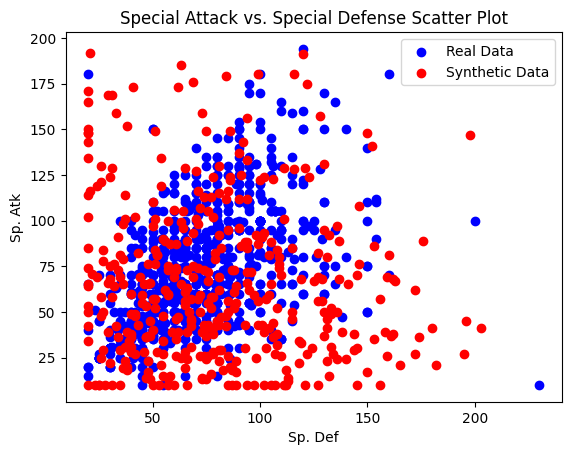

In [34]:
# Scatterplot für echte Daten
plt.scatter(df['Sp. Def'], df['Sp. Atk'], color='blue', label='Real Data')

# Scatterplot für synthetische Daten
plt.scatter(synthetic_CTGAN['Sp. Def'], synthetic_CTGAN['Sp. Atk'], color='red', label='Synthetic Data')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Special Attack vs. Special Defense Scatter Plot')
plt.xlabel('Sp. Def')
plt.ylabel('Sp. Atk')

# Legende hinzufügen
plt.legend()

# Das Diagramm anzeigen
plt.show()


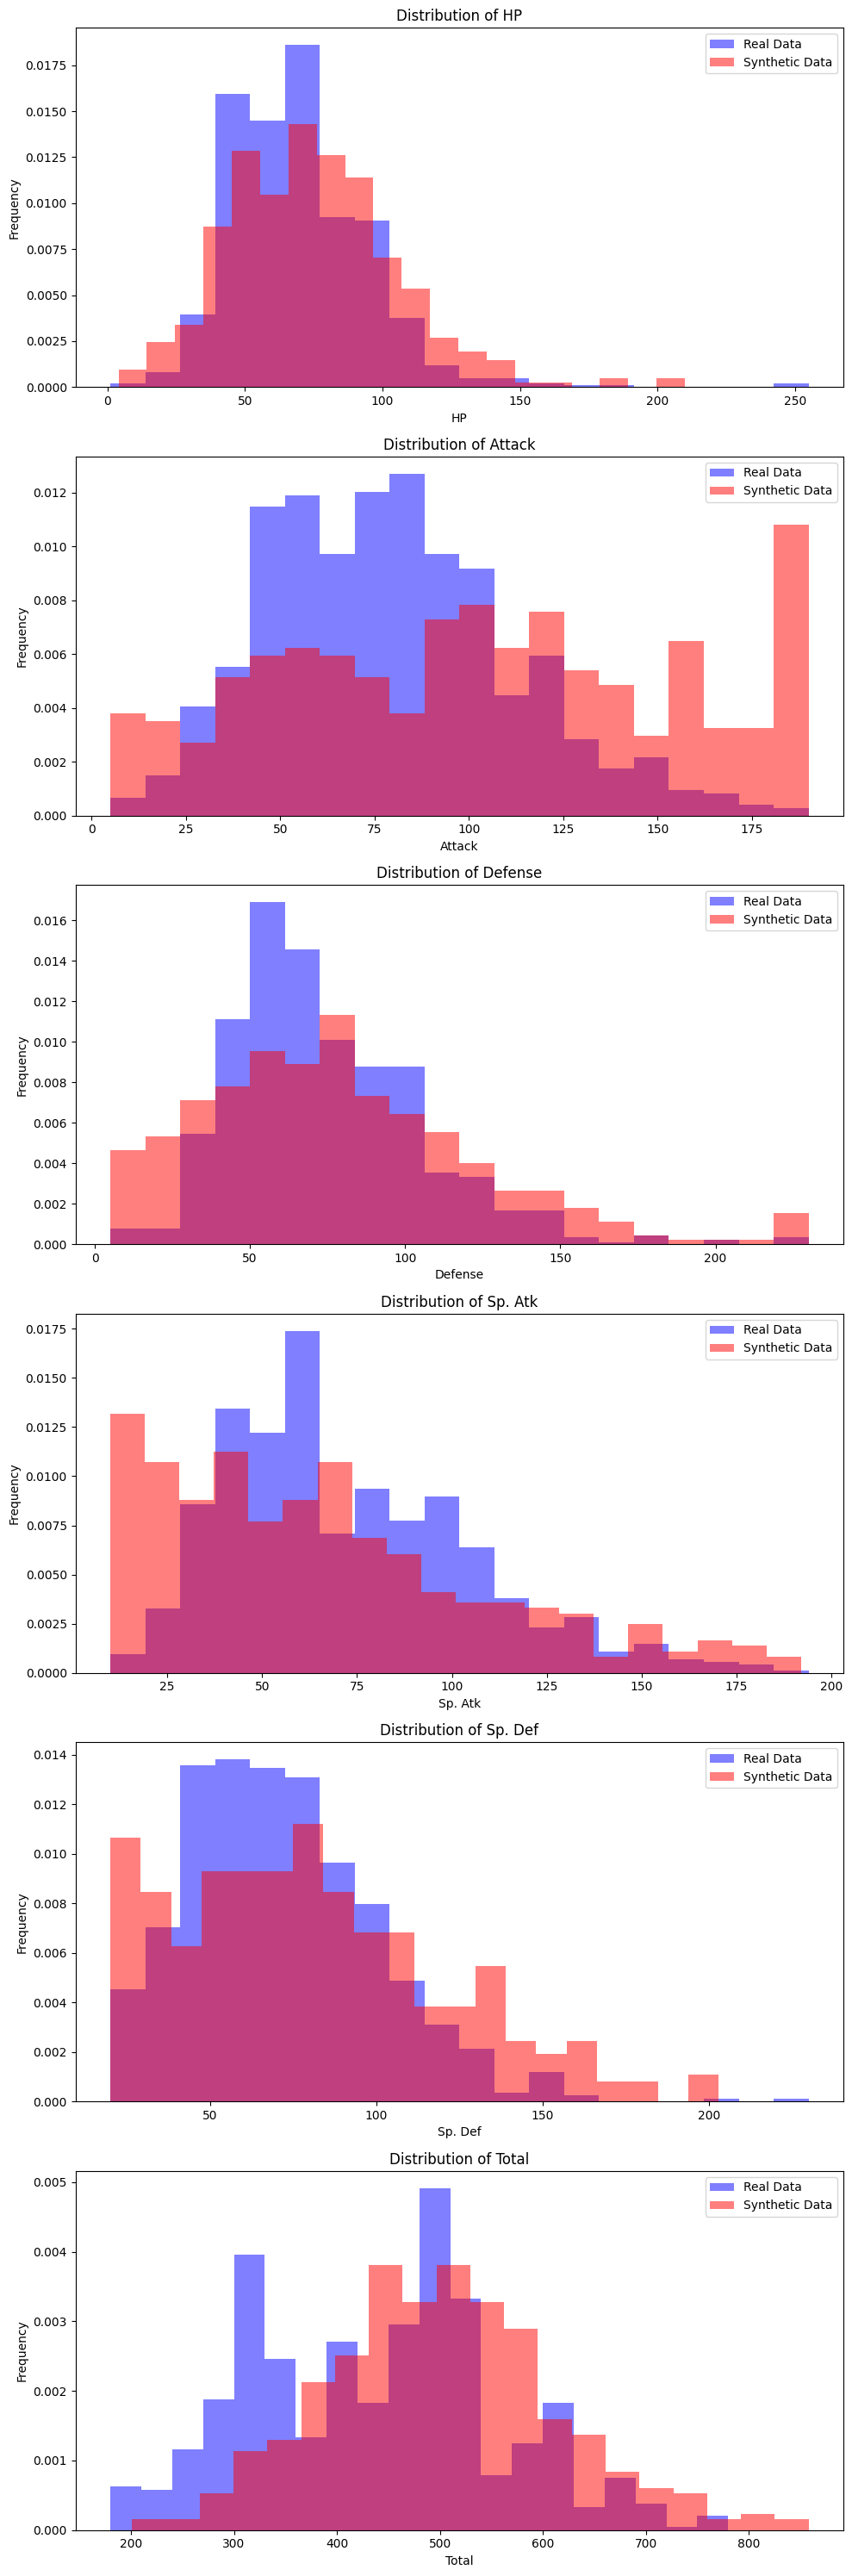

In [40]:
import matplotlib.pyplot as plt

# Liste der zu vergleichenden Eigenschaften
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Total']

# Anzahl der Subplots ermitteln
num_features = len(features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Jede Eigenschaft durchgehen und ein Histogramm zeichnen
for i, feature in enumerate(features):
    # Histogramm für echte Daten
    axes[i].hist(df[feature], bins=20, alpha=0.5, label='Real Data', color='blue', density=True)
    # Histogramm für synthetische Daten
    axes[i].hist(synthetic_CTGAN[feature], bins=20, alpha=0.5, label='Synthetic Data', color='red', density=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Layout anpassen, um Überlappungen zu vermeiden
plt.tight_layout()
plt.show()


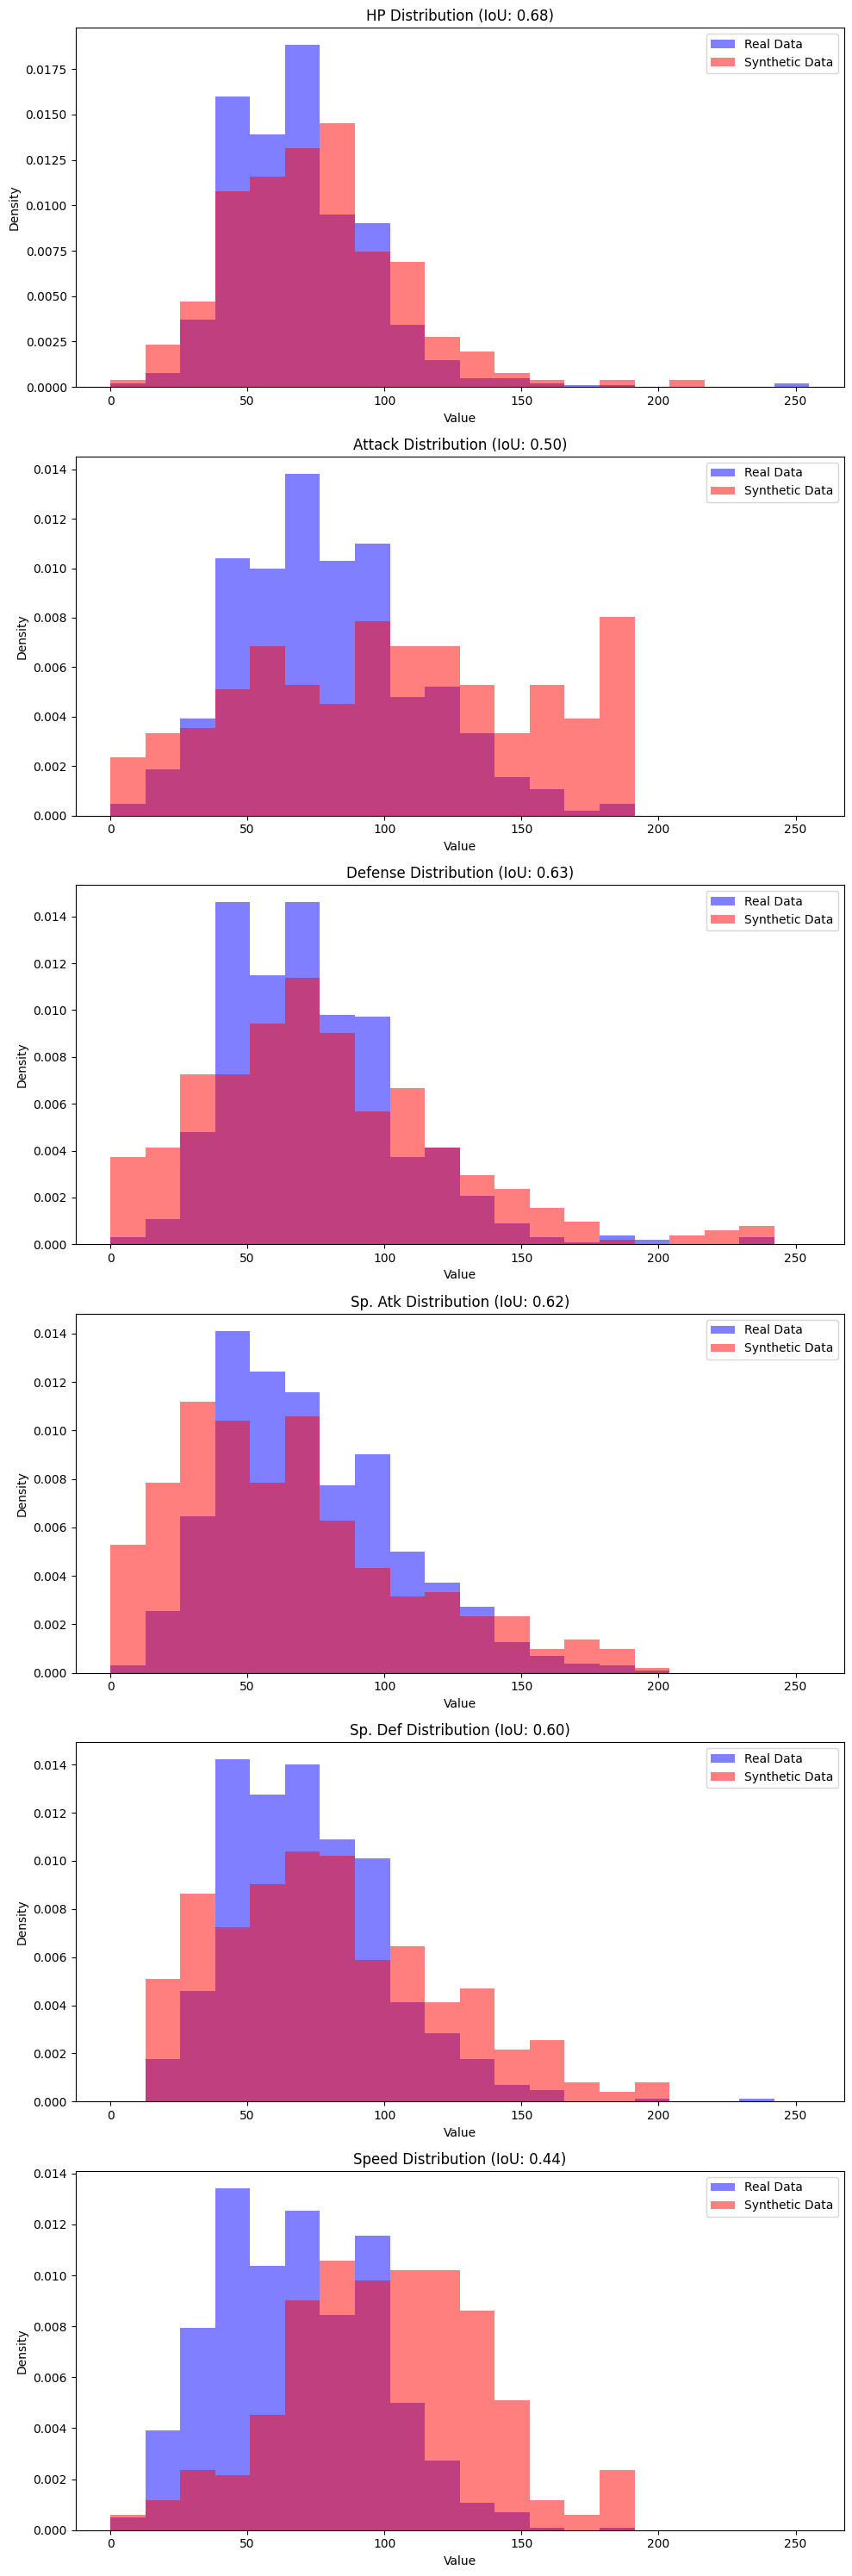

IoU for HP: 0.68
IoU for Attack: 0.50
IoU for Defense: 0.63
IoU for Sp. Atk: 0.62
IoU for Sp. Def: 0.60
IoU for Speed: 0.44


In [46]:
# Features, die betrachtet werden
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Ersetze NaN-Werte durch 'none' in einem separaten DataFrame für nicht-numerische Zwecke
df_non_numeric = df[features].fillna('none')
synthetic_CTGAN_non_numeric = synthetic_CTGAN[features].fillna('none')

# Für numerische Operationen musst du weiterhin NaN-Werte durch numerische Werte ersetzen oder ignorieren
df_numeric = df[features].fillna(0)  # Beispiel: Ersetzen durch 0 für numerische Operationen
synthetic_CTGAN_numeric = synthetic_CTGAN[features].fillna(0)

# Fortfahren mit der Histogramm- und IoU-Berechnung, die numerische Daten benötigt
import numpy as np
import matplotlib.pyplot as plt

# Bins definieren (gleiche Bins für beide Verteilungen)
bins = np.linspace(0, max(df_numeric.max().max(), synthetic_CTGAN_numeric.max().max()), 21)

# IoU Werte und Histogramme generieren
iou_scores = []
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(10, 5 * len(features)))

for i, feature in enumerate(features):
    real_hist, _ = np.histogram(df_numeric[feature], bins=bins, density=True)
    synthetic_hist, _ = np.histogram(synthetic_CTGAN_numeric[feature], bins=bins, density=True)
    intersection = np.minimum(real_hist, synthetic_hist).sum()
    union = np.maximum(real_hist, synthetic_hist).sum()
    iou = intersection / union
    iou_scores.append(iou)

    axes[i].hist(df_numeric[feature], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
    axes[i].hist(synthetic_CTGAN_numeric[feature], bins=bins, alpha=0.5, label='Synthetic Data', color='red', density=True)
    axes[i].set_title(f'{feature} Distribution (IoU: {iou:.2f})')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Ausgabe der IoU Werte für jedes Feature
for feature, score in zip(features, iou_scores):
    print(f'IoU for {feature}: {score:.2f}')


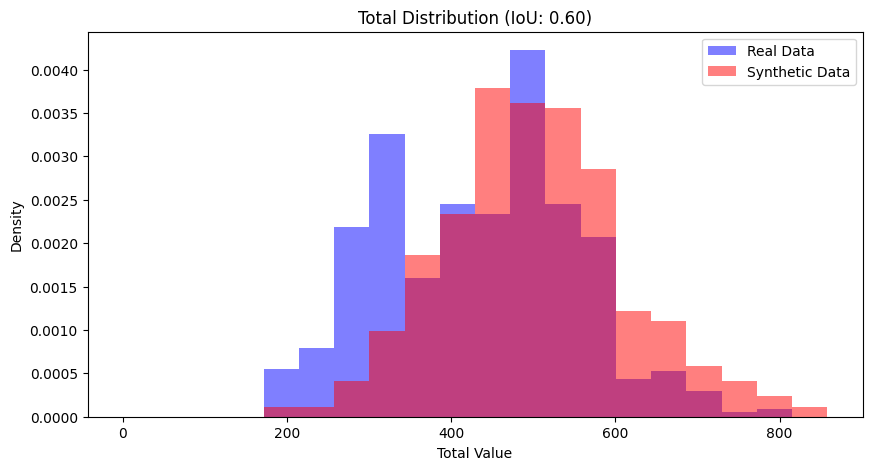

IoU for Total: 0.60


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Bins definieren
bins = np.linspace(0, max(df["Total"].max(), synthetic_CTGAN["Total"].max()), 21)

# Histogramm- und IoU-Berechnung
real_hist, _ = np.histogram(df["Total"], bins=bins, density=True)
synthetic_hist, _ = np.histogram(synthetic_CTGAN["Total"], bins=bins, density=True)

intersection = np.minimum(real_hist, synthetic_hist).sum()
union = np.maximum(real_hist, synthetic_hist).sum()
iou = intersection / union

# Plotting
plt.figure(figsize=(10, 5))
plt.hist(df["Total"], bins=bins, alpha=0.5, label='Real Data', color='blue', density=True)
plt.hist(synthetic_CTGAN["Total"], bins=bins, alpha=0.5, label='Synthetic Data', color='red', density=True)
plt.title(f'Total Distribution (IoU: {iou:.2f})')
plt.xlabel('Total Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Ausgabe des IoU Wertes
print(f'IoU for Total: {iou:.2f}')
